# Monte Carlo Analysis of LDPC Decoders

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulators import MonteCarloSimulator
from channels import BinarySymmetricChannel, BinaryErasureChannel, BinaryAWGNChannel
from encoders import BasicEncoder
from decoders import Gallager
from utils import read_ldpc_graph

## Gallager B Decoding - BSC

In [2]:
G = read_ldpc_graph('data/Tanner.dat')
encoder = BasicEncoder(G)
decoder = Gallager(G, variant='B')

In [3]:
alpha = np.linspace(0.01, 0.2, 20)
frame_error_rate = np.zeros_like(alpha)
for i, a in enumerate(alpha):
    channel = BinarySymmetricChannel(alpha=a)
    simulator = MonteCarloSimulator(encoder, decoder, channel)
    frame_error_rate[i] = simulator.run(numtrials=int(1e3))

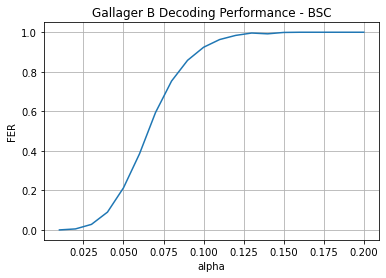

In [4]:
plt.plot(alpha, frame_error_rate, linewidth=1.5)
plt.title('Gallager B Decoding Performance - BSC')
plt.xlabel('alpha')
plt.ylabel('FER')
plt.grid(True)

## Gallager B Decoding - BEC

In [5]:
epsilon = np.linspace(0.01, 0.2, 20)
frame_error_rate = np.zeros_like(epsilon)
for i, a in enumerate(epsilon):
    channel = BinaryErasureChannel(epsilon=a)
    simulator = MonteCarloSimulator(encoder, decoder, channel)
    frame_error_rate[i] = simulator.run(numtrials=int(1e3))

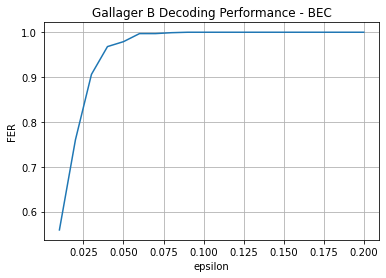

In [6]:
plt.plot(epsilon, frame_error_rate, linewidth=1.5)
plt.title('Gallager B Decoding Performance - BEC')
plt.xlabel('epsilon')
plt.ylabel('FER')
plt.grid(True)

## Gallager B Decoding - B-AWGN

In [7]:
sigma = np.linspace(0.1, 2, 20)
frame_error_rate = np.zeros_like(sigma)
for i, a in enumerate(sigma):
    channel = BinaryAWGNChannel(sigma=a)
    simulator = MonteCarloSimulator(encoder, decoder, channel)
    frame_error_rate[i] = simulator.run(numtrials=int(1e3))

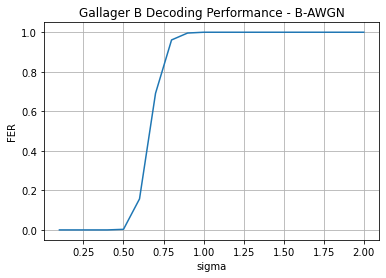

In [8]:
plt.plot(sigma, frame_error_rate, linewidth=1.5)
plt.title('Gallager B Decoding Performance - B-AWGN')
plt.xlabel('sigma')
plt.ylabel('FER')
plt.grid(True)